# Global Average Pooling

In [1]:
# Convolutional Neural Network (GOOD PIZZA  vs BURNT PIZZA)

# Building the CNN

#Importing Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense, BatchNormalization,GlobalAvgPool2D
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.preprocessing import image


In [2]:
#loading data

image_width=150
image_height=150

train_data_dir=r'data/pizza_ds/Train'
test_data_dir=r'data/pizza_ds/Test'
validation_data_dir=r'data/pizza_ds/Val'

#train_sample=30
#validation_sample=25
test_sample=50

#epochs=30
batch_size=12
test_size=50

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape= (3,image_width,image_height)
else :
    input_shape= (image_width,image_height,3)

In [4]:
# Data Augmentation

train_datagen= ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  rescale=1./255,
                                  horizontal_flip=True,
                                  fill_mode='nearest');

validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_genarator= train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(image_width,image_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')


validation_genarator= validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size=(image_width,image_height),
                                                             batch_size=batch_size,
                                                             class_mode='binary')


test_genarator= test_datagen.flow_from_directory(test_data_dir,
                                                 target_size=(image_width,image_height),
                                                 batch_size=test_size,
                                                 class_mode='binary')

Found 566 images belonging to 2 classes.
Found 221 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


model.add(GlobalAvgPool2D())  which is going to take average of all the feature maps & it is directly fed to the o/p layer.
 
no flattening, no elimination of dense layers, all of that can be elimited.

In [6]:
# Build model

# Initialising the CNN

model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape, activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# Adding a second convolutional layer
model.add(Conv2D(32,(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a third convolutional layer
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flattening
model.add(GlobalAvgPool2D())    

# Full connection
# model.add(Dense(64, activation='relu',))
# model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-09-30 14:02:55.193379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 activation (Activation)     (None, 34, 34, 64)        0

The number of trainable parameters r v less here compared to if we had a fully connected dense n/w.

In Global average pooling layer its just the avg u take there r no trainable parameters same like in MaxPool.

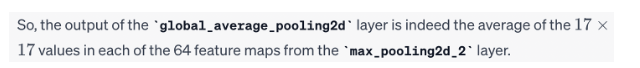

### Why called as Global Average Pooling ?

For instance, if the input to the global_average_pooling2d layer is of shape (17, 17, 64), it will compute the average of the 17 x 17 values for each of the 64 channels, producing an output of shape (64,).

The term "global" in global_average_pooling2d refers to the operation being applied over the entire spatial extent of the feature map, as opposed to "local" pooling operations like typical max pooling or average pooling layers, which operate over smaller, local regions of the feature map.

In [8]:
### Fitting the CNN to the images

print('starting training....')

model.fit(train_genarator,steps_per_epoch=train_genarator.samples//batch_size,
          epochs=10,
          validation_data=validation_genarator,
          validation_steps=validation_genarator.samples//batch_size)

starting training....
Epoch 1/10
47/47 [==============================] - 5s 106ms/step - loss: 0.6952 - accuracy: 0.5181 - val_loss: 0.6778 - val_accuracy: 0.5833
Epoch 2/10
47/47 [==============================] - 5s 101ms/step - loss: 0.6713 - accuracy: 0.5560 - val_loss: 0.5740 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 5s 101ms/step - loss: 0.6472 - accuracy: 0.6390 - val_loss: 0.5245 - val_accuracy: 0.8194
Epoch 4/10
47/47 [==============================] - 5s 101ms/step - loss: 0.6156 - accuracy: 0.6733 - val_loss: 0.4703 - val_accuracy: 0.7731
Epoch 5/10
47/47 [==============================] - 5s 98ms/step - loss: 0.5923 - accuracy: 0.6751 - val_loss: 0.4916 - val_accuracy: 0.8148
Epoch 6/10
47/47 [==============================] - 5s 103ms/step - loss: 0.5841 - accuracy: 0.6859 - val_loss: 0.7056 - val_accuracy: 0.6389
Epoch 7/10
47/47 [==============================] - 5s 99ms/step - loss: 0.6095 - accuracy: 0.6625 - val_loss: 0.5934 - val_acc

In [9]:
model.evaluate(test_genarator)

4/4 [==============================] - 1s 111ms/step - loss: 0.6515 - accuracy: 0.6131


[0.6514607071876526, 0.6130653023719788]

In [10]:
print('training finished!!')

training finished!!


In [11]:
def obtain_inference(img):
    im = image.img_to_array(img)
    img1 = im/255
    img1 = img1.reshape((1,150,150,3))
    prediction = model.predict(img1)
    if prediction > 0.5:
        print('Good Pizza')
    else:
        print('Burnt Pizza')

In [12]:
img1 = image.load_img(r'data/pizza_ds/Test/Good/good (100).jpg',target_size=(150,150))
obtain_inference(img1)

1/1 [==============================] - 0s 56ms/step
Good Pizza


In [13]:
img2 = image.load_img(r'data/pizza_ds/Test/Burnt/170.jpg',target_size=(150,150))
obtain_inference(img2)

1/1 [==============================] - 0s 15ms/step
Burnt Pizza


### About Global Average Pooling


    1.Global Average Pooling is a pooling operation designed to replace fully connected layers in classical CNNs.
    
    2.Instead of adding fully connected layers on top of the feature maps, we take the average of each feature map, and the resulting vector is fed directly into the output layer.
    
    3.No parameter to optimize in the global average pooling thus overfitting is avoided at this layer.
    
    4. Suppose there are 64 feature maps each of 100X100, then GAP takes the average of these 64 feature maps resulting in    64 values which are fed into the output layer directly
    
    5. GAP is proven to work better than having dense fully connected layers.

*Fully connected layers take more processing time, have more trainable parameters, when u flatten it increases number of dimensions, so we get rid of this & directly feed convolution o/p to final o/p layer without needing any dense layers/hidden layers/fully connected layers in between.*